<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработаем-пропуски" data-toc-modified-id="Обработаем-пропуски-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработаем пропуски</a></span></li><li><span><a href="#Изменим-тип-данных" data-toc-modified-id="Изменим-тип-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменим тип данных</a></span></li><li><span><a href="#Проверим-наличие-дубликатов-и-избавимся-от-них,-если-есть" data-toc-modified-id="Проверим-наличие-дубликатов-и-избавимся-от-них,-если-есть-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Проверим наличие дубликатов и избавимся от них, если есть</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучим-типичную-площадь,-цену,-число-комнат,-высоту-потолков-и-время-продажи-квартиры" data-toc-modified-id="Изучим-типичную-площадь,-цену,-число-комнат,-высоту-потолков-и-время-продажи-квартиры-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучим типичную площадь, цену, число комнат, высоту потолков и время продажи квартиры</a></span></li><li><span><a href="#Обработаем-выбросы" data-toc-modified-id="Обработаем-выбросы-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Обработаем выбросы</a></span></li><li><span><a href="#Факторы,-влияющие-на-стоимость-квартиры" data-toc-modified-id="Факторы,-влияющие-на-стоимость-квартиры-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Факторы, влияющие на стоимость квартиры</a></span></li><li><span><a href="#Анализ-квартир-в-центре-Санкт-Петербурга" data-toc-modified-id="Анализ-квартир-в-центре-Санкт-Петербурга-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Анализ квартир в центре Санкт-Петербурга</a></span></li><li><span><a href="#Факторы,-влияющие-на-стоимость-квартиры-в-центре" data-toc-modified-id="Факторы,-влияющие-на-стоимость-квартиры-в-центре-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Факторы, влияющие на стоимость квартиры в центре</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

Проанализируем данные о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет, предоставленные сервисом Яндекс.Недвижимость. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 
Необходимо установить параметры, влияющие на рыночную стоимость объектов недвижимости. Это позволит в дальнейшем построить автоматизированную систему, которая будет отслеживать аномалии и мошенническую деятельность.

## Изучение данных из файла

In [1]:
import pandas as pd
from IPython.display import display

server_path = '/datasets/real_estate_data.csv'
filename = 'real_estate_data.csv'
try:
    data = pd.read_csv(server_path, sep=",")
except: 
    data = pd.read_csv(filename)
    
data.info()
display(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
Unnamed: 0              23699 non-null int64
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest   

,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


### Вывод

В датасете 22 переменных и 23699 наблюдений, названия переменных закодированы корректно. Обнаружены пропуски  в следующих переменных:
- ceiling_height (высота потолков)
- floors_total (всего этажей в доме)
- living_area (жилая площадь в квадратных метрах)
- kitchen_area  (площадь кухни в квадратных метрах)
- balcony (число балконов)
- locality_name (название населённого пункта)
- airports_nearest (расстояние до ближайшего аэропорта в метрах)
- cityCenters_nearest (расстояние до центра города)
- parks_around3000 (число парков в радиусе)
- parks_nearest (расстояние до ближайшего парка)
- ponds_around3000 (число водоёмов в радиусе 3 км)
- ponds_nearest (расстояние до ближайшего водоёма)
- days_exposition  (сколько дней было размещено объявление)
- is_apartment (апартаменты)

Кроме того, у части переменных необходимо изменить тип данных:
- на формат datetime: для переменной first_day_exposition
- на формат bool: для переменной is_apartment
- на формат integer: для переменных balcony, days_exposition, floors_total, parks_around3000, ponds_around3000

## Предобработка данных

### Обработаем пропуски ###

Получим информацию о пропусках в данных

In [2]:
print('Количество пропусков:')
print(data.isnull().sum())

Количество пропусков:
Unnamed: 0                  0
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [3]:
# заменим пропуски ceiling_height на медианное значение
print(data['ceiling_height'].describe())
print(data[data['ceiling_height'] > 5]['ceiling_height'].count())
data['ceiling_height'] = data['ceiling_height'].fillna(value = data['ceiling_height'].median())

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64
36


В датасете есть 36 аномально больших значений высоты потолков, однако выбросов относительно всей выборки не очень много (что подтверждается небольшим отклонением медианы от среднего). Поэтому пропуски можно заменить на медианное значение.

In [4]:
# изучим данные с пропущенными значениями в floors_total
data[data['floors_total'].isna()]

,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.65,NaN,NaN,9,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.80,NaN,NaN,3,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,2.65,NaN,31.70,20,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,2.65,NaN,45.38,6,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,2.65,NaN,50.40,18,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


Пропуски в количестве этажей невозможно восстановить ни по одной из переменных, поскольку все наблюдения с пропусками разные. Отставим как есть.

In [5]:
# посчитаем средний процент жилой площади от всей площади с группировкой по числу комнат
data['living_share']= data['living_area']/data['total_area']
rooms_group = data.groupby('rooms').agg({'living_share' : 'median'})
display(rooms_group)
# заменим пропуски жилой площади на расчетное значение по общей площади исходя из посчитанных долей
for rooms in rooms_group.index:
    data.loc[data['rooms'] == rooms,'living_area'] = data.loc[data['rooms'] == rooms,'living_area']\
    .fillna(rooms_group.loc[rooms, 'living_share']*data['total_area']) 

,living_share
rooms,
0,0.689655
1,0.482488
2,0.585009
3,0.631667
4,0.659740
5,0.651842
6,0.679412
7,0.681670
8,0.688475


Поскольку соотношение жилой и общей площади заметно варьируется для квартир с разным числом комнат, можно заменить пропуски в жилой площади на произведение доли, типичной для заданного числа комнат, и общей площади.

In [6]:
display(data.pivot_table(
    index='rooms', values=['kitchen_area', 'total_area'], aggfunc='count'))
# заменим пропуски в площади кухни в квартирах с 0 комнатами на 0
data.loc[data['rooms'] == 0,'kitchen_area']= data.loc[data['rooms'] == 0,'kitchen_area'].fillna(0)

# посчитаем средний процент жилой площади от всей площади с группировкой по числу комнат
data['kitchen_share']= data['kitchen_area']/data['total_area']
kitchen_group = data.groupby('rooms').agg({'kitchen_share' : 'median'})
display(kitchen_group)

# заменим пропуски kitchen_area на расчетное значение по общей площади исходя из посчитанных долей
for rooms in kitchen_group.index:
    data.loc[data['rooms'] == rooms,'kitchen_area'] = data.loc[data['rooms'] == rooms,'kitchen_area']\
    .fillna(kitchen_group.loc[rooms, 'kitchen_share']*data['total_area'])

,kitchen_area,total_area
rooms,,
0,0,197
1,7213,8047
2,7286,7940
3,5380,5814
4,1081,1180
5,285,326
6,97,105
7,52,59
8,9,12


,kitchen_share
rooms,
0,0.000000
1,0.247839
2,0.161075
3,0.128571
4,0.112245
5,0.105386
6,0.099502
7,0.083717
8,0.109170


Поскольку все квартиры с 0 комнат имеют пропуски в площади кухни, можно заменить пропущенные значения на 0 для всех аналогичных объектов. Пропуски в оставшихся наблюдениях заменили на произведение общей площади и медианное значение доли площади кухни от общей площади.

In [7]:
#избавимся от пропусков в balcony и is_apartment
data['is_apartment'] = data['is_apartment'].fillna(False)
data['balcony'] = data['balcony'].fillna(0)

Будем считать, что пропуски в переменной balcony означают отсутствие балкона и заменим их на 0. Пропуски в переменной is_apartment заменим на False, предполагая, что данный тип недвижимости появился на рынке относительно недавно и не заполнялся в более старых объявлениях.

In [8]:
print('Пропуски locality_name')
display(data[data['locality_name'].isna()].head(30))

print('Населенные пункты с пропусками airports_nearest')
display(data[data['airports_nearest'].isna()]['locality_name'].value_counts().head(20))

print('Населенные пункты с пропусками locality_name')
data[data['cityCenters_nearest'].isna()]['locality_name'].value_counts().head(20) 

print('Пропуски days_exposition')
display(data[data['days_exposition'].isna()].head(30))

Пропуски locality_name


,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_share,kitchen_share
1097,1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.800000,2,...,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0,0.621787,0.107711
2033,2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,2.65,4.0,42.600000,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,0.532500,0.232500
2603,2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,2.65,24.0,15.600000,3,...,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0,0.365340,0.250585
2632,2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,2.65,24.0,33.100000,21,...,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0,0.530449,0.131410
3574,3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,2.65,5.0,30.800000,5,...,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0,0.662366,0.139785
4151,4151,17,17600000.0,89.5,2014-12-09T00:00:00,2,3.00,8.0,39.620000,7,...,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0,0.442682,0.149497
4189,4189,7,9200000.0,80.0,2015-12-10T00:00:00,3,4.00,4.0,52.300000,3,...,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0,0.653750,0.130000
4670,4670,1,5500000.0,83.0,2015-08-14T00:00:00,3,2.65,7.0,52.428333,6,...,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0,NaN,NaN
5343,5343,19,13540000.0,85.5,2016-01-20T00:00:00,3,2.65,7.0,59.100000,5,...,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0,0.691228,0.097076
5707,5707,7,3700000.0,30.0,2016-04-29T00:00:00,1,2.65,24.0,20.000000,23,...,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0,0.666667,NaN


Населенные пункты с пропусками airports_nearest


посёлок Мурино             522
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    173
деревня Новое Девяткино    144
Сертолово                  142
Кириши                     125
Сланцы                     112
Волхов                     111
Тосно                      104
Кингисепп                  104
Никольское                  93
Коммунар                    89
Сосновый Бор                87
Санкт-Петербург             85
Кировск                     84
Отрадное                    80
посёлок Бугры               69
Name: locality_name, dtype: int64

Населенные пункты с пропусками locality_name
Пропуски days_exposition


,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_share,kitchen_share
0,0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.472222,0.231481
7,7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,41.886654,22,...,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,NaN,0.263966
44,44,13,5350000.0,40.00,2018-11-18T00:00:00,1,2.65,22.0,19.299520,3,...,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN,NaN,NaN
45,45,17,5200000.0,50.60,2018-12-02T00:00:00,2,2.65,9.0,30.300000,7,...,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN,0.598814,0.138340
46,46,17,6600000.0,52.10,2019-01-31T00:00:00,2,2.60,24.0,29.700000,9,...,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN,0.570058,0.159309
49,49,1,3050000.0,30.80,2018-11-22T00:00:00,1,2.50,9.0,18.000000,7,...,Санкт-Петербург,45341.0,16603.0,1.0,675.0,0.0,NaN,NaN,0.584416,0.194805
52,52,20,11795000.0,136.00,2017-09-22T00:00:00,6,3.00,2.0,94.000000,2,...,Санкт-Петербург,16510.0,6582.0,1.0,526.0,0.0,NaN,NaN,0.691176,0.080882
71,71,20,4850000.0,57.50,2019-03-27T00:00:00,3,2.50,9.0,39.000000,8,...,Санкт-Петербург,33623.0,12267.0,1.0,334.0,1.0,333.0,NaN,0.678261,0.107826
81,81,9,10949000.0,68.00,2018-12-27T00:00:00,1,2.65,10.0,32.809183,6,...,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,84,11,2400000.0,43.90,2019-03-13T00:00:00,2,2.65,2.0,27.460000,1,...,Кировск,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.625513,0.118451


В наблюдениях с пропусками в locality_name нет закономерностей.
В пропусках airports_nearest и cityCenters_nearest преобладают поселки. Возможно, расстояние не указано, поскольку аэропорт слишком далеко, а центра города как такового нет.
Причина пропусков в days_exposition не ясна, поэтому невозможно подобрать адекватный способ замены.
Оставим пропуски всех четырех переменных без изменений.

In [9]:
#заменим пропуски в parks_around3000 на 0
data['parks_around3000'] = data['parks_around3000'].fillna(0)

# 15620 пропусков в переменной parks_nearest связано с отсутствием парков, поэтому заменять пропуски не нужно
print('Расстояние до парка не указано, парков нет:',
      len(data[(data['parks_nearest'].isna()) & (data['parks_around3000']==0)]))
print('Расстояние до парка не указано, парки есть:', 
      len(data[(data['parks_nearest'].isna()) & (data['parks_around3000']!=0)]))

#заменим пропуски в ponds_around3000 на 0
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

# 14589 пропусков в переменной ponds_nearest связано с отсутствием водоемов
print('Расстояние до водоема не указано, водоемов нет:',
      len(data[(data['ponds_nearest'].isna()) & (data['ponds_around3000']==0)]))
print('Расстояние до водоема не указано, водоемы есть:',
      len(data[(data['ponds_nearest'].isna()) & (data['ponds_around3000']!=0)]))

Расстояние до парка не указано, парков нет: 15620
Расстояние до парка не указано, парки есть: 0
Расстояние до водоема не указано, водоемов нет: 14589
Расстояние до водоема не указано, водоемы есть: 0


Исходим из того, что пропуски в переменных parks_around3000 и ponds_around3000 означают отсутствие парков и водоемов в радиусе 3 километров, поэтому их можно заменить на 0. Пропуски в расстоянии до ближайших парков и водоемов связаны с отсутствием таковых, поэтому логично оставить значения без изменений.

In [10]:
print('Количество пропусков после замены:')
print(data.isnull().sum())

Количество пропусков после замены:
Unnamed: 0                  0
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
living_share             1903
kitchen_share            2081
dtype: int64


Значительно сократили число переменных с пропусками, использовав замену на нулевые или характерные значения там, где это возможно. Для других данных нет подходящего значения на замену, такие переменные оставлены без изменений. Стоит обратить внимание на большое количество пропусков в переменной days_exposition и выяснить причину.

### Изменим тип данных ###

In [11]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

data = data.astype({"is_apartment": "bool", "balcony": "int", "last_price": "int", 
             "parks_around3000": "int", "ponds_around3000": "int"})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 25 columns):
Unnamed: 0              23699 non-null int64
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int64
parks_nearest  

Перевели целочисленные переменные (balcony, parks_around3000, ponds_around3000), а также last_price - для точности расчетов - в формат integer; first_day_exposition - в формат datetime; is_apartment - в формат bool. В остальных переменных мешают пропуски (floors_total, days_exposition).

### Проверим наличие дубликатов и избавимся от них, если есть ###

In [12]:
print('Дубликатов в таблице: {}'.format(data.duplicated().sum()))
data = data.drop_duplicates().reset_index(drop=True)

Дубликатов в таблице: 0


## Расчёты и добавление результатов в таблицу

Посчитаем и добавим в таблицу:
цену квадратного метра;
день недели, месяц и год публикации объявления;
этаж квартиры (варианты — первый, последний, другой).
Переменные соотношения жилой и общей площади, а также отношения площади кухни к общей добавлены на этапе обработки пропусков (living_share, kitchen_share).

In [13]:
#цена квадратного метра
data['price_per_meter']= data['last_price']/data['total_area']

In [14]:
#день недели, месяц и год публикации объявления
data['weekday']= data['first_day_exposition'].dt.weekday
data['month']= data['first_day_exposition'].dt.month
data['year']= data['first_day_exposition'].dt.year

In [15]:
#этаж квартиры: варианты — первый, последний, другой
def floor_group(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'
data['floor_group'] = data.apply(floor_group, axis = 1)
data['floor_group'].value_counts()

другой       17446
последний     3336
первый        2917
Name: floor_group, dtype: int64

## Исследовательский анализ данных ##

### Изучим типичную площадь, цену, число комнат, высоту потолков и время продажи квартиры ###

total_area


count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

last_price


count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

rooms


count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

ceiling_height


count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

days_exposition


count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

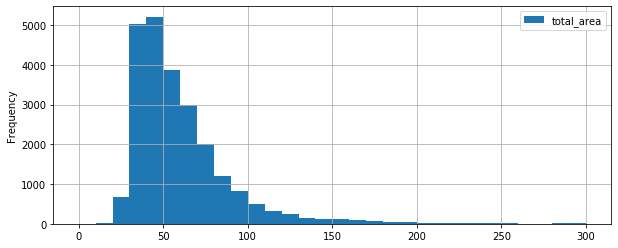

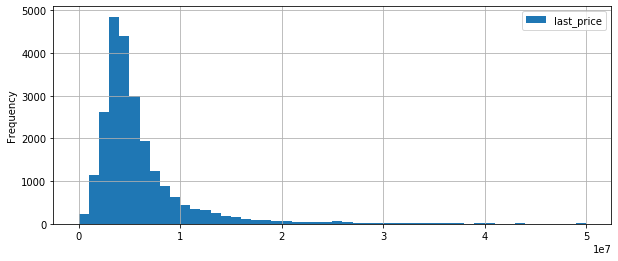

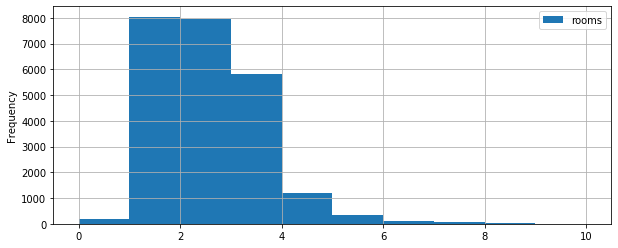

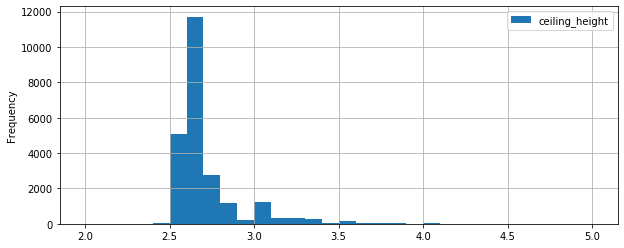

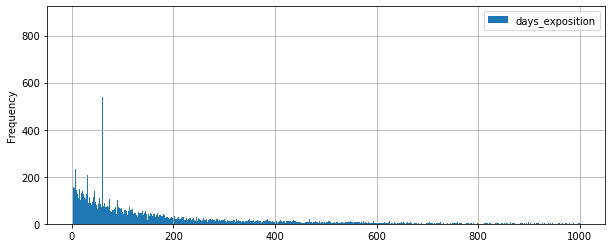

In [16]:
var_list = ['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']
for var in var_list:
    print (var)
    display(data.loc[:,var].describe())

data.plot(y = 'total_area', kind = 'hist', bins = 30, grid=True, figsize = (10,4), range = (0,300))
data.plot(y = 'last_price', kind = 'hist', bins = 50, grid=True, figsize = (10,4), range = ( 0, 50000000))
data.plot(y = 'rooms', kind = 'hist', bins = 10, grid=True, figsize = (10,4), range = (0,10))
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, grid=True, figsize = (10,4), range = (2,5))
data.plot(y = 'days_exposition', kind = 'hist', bins = 1000, grid=True, figsize = (10,4), range = (1,1000))

**Площадь.**
Площадь подавляющего большинства квартир варьируется от 30 до 100 квадратных метров, при этом 50% значений находятся в диапазоне 40-70. Пиковое значение на гистограмме - 40-50, форма гистограммы похожа на распределение Пуассона. Аномально низкое минимальное значение (2 кв. метра) и  сильно выбивающееся максимальное (900 кв. метров) свидетельствуют о выбросах, что объясняет существенное отличие среднего от медианы.

**Цена.**
Большинство картир продается по цене от 2 до 10 млн с пиковым знчением 4-5 млн. Межквартильный размах составляет 3.4-6.8 млн рублей. Распределение похоже на нормальное с длинным правым хвостом. Cущественное отличие среднего от медианы также говорит о наличии выбросов и, если максимальная цена (763 000 000 рублей) теоретически возможна, то минимальное значение (12 190 рублей) - это явная ошибка.

**Число комнат.**
Чаще всего продают однокомнатные и двухкомнатные квартиры, при этом 90% продаваемых квартир имеют от 1 до 3 комнат. Максимальное число комнат - 19 - выбивающееся значение, при этом такие квартиры могут существовать на рынке. Среднее от медианы практически не отличается, влияние выбросов слабое.

**Высота потолков.**
50% значений находятся в диапазоне от 2.6 до 2.7 метров, и это так же пик на гистограмме. Максимальная высота потолков 100 метров и минимальная 1 метр - выбросы.

**Время продажи квартиры.**
50% значений находятся в диапазоне: от 45 до 232 дней. Интересно, что среднее от медианы отличается ровно в 2 раза: в данных явно проблема. Поэтому построили гистограмму с максимальной детализацией (по дням) и обнаружили явные пики в диапазоне от 0 до 100 дней, изучим их отдельно.

*Полученная на этом этапе информация не только позволяет получить общее представление о рынке недвижимости, но поможет избавиться от выбросов для дальнейшего анализа.*

**Проанализируем аномальные значения days_exposition**

45.0    880
60.0    538
7.0     234
30.0    208
90.0    204
4.0     176
3.0     158
5.0     152
14.0    148
9.0     143
20.0    139
8.0     139
44.0    138
11.0    135
18.0    129
13.0    128
10.0    127
15.0    126
28.0    126
22.0    125
Name: days_exposition, dtype: int64

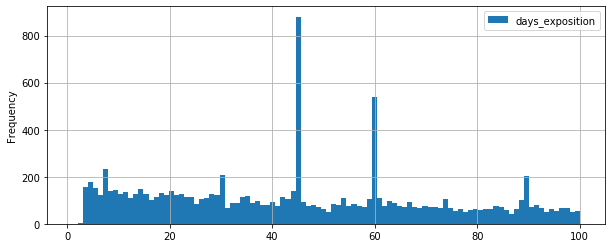

In [17]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (10,4), range = (1,100))
data['days_exposition'].value_counts().head(20)

Пиковые частоты приходятся на 45 и 60 дней.

По запорсу "яндекс недвижимость 45 дней" поиск выдает Справку по правилам размещения (https://yandex.ru/support/realty/owner/home/add-ads-housing.html), в которй указано, что объявления снимаются через: 45 дней (при цене до 4,5 млн); 60 дней (при цене от 4,5 до 10 млн); 90 дней (при цене от 10 млн). Но эти правила действуют по всей России кроме Москвы, Санкт-Петербурга и их областей. Сроки публикации в Спб изменились с 1 апреля 2020 года (размещение объявлений от собственников и частных агентов стало платным: https://yandex.ru/support/realty/paid.html#paid). Значит, до 1 апреля 2020 года действовали условия, как в других регионах. 

Следовательно, из данных нужно убрать объекты с days_exposition, равным 45, 90 и 60 - там не было продажи, просто объявления сняли и по ним делать выводы не стоит.

### Обработаем выбросы ###

Надо избавиться от выбросов и выбивающихся значений (таких значений мало, ценности в них нет, но оценки смещают)

In [18]:
good_data = data.query('not((days_exposition == 60 and 4500000 <= last_price < 10000000)\
           or (days_exposition == 45 and last_price < 4500000)\
           or (days_exposition == 90 and last_price > 10000000))')

good_data = good_data.query('20 <= total_area <= 250\
and 500000 <= last_price <= 100000000\
and 0 <= rooms <= 8\
and 2.5 <= ceiling_height <= 4.5\
and days_exposition <= 600')

print(good_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18612 entries, 1 to 23695
Data columns (total 30 columns):
Unnamed: 0              18612 non-null int64
total_images            18612 non-null int64
last_price              18612 non-null int64
total_area              18612 non-null float64
first_day_exposition    18612 non-null datetime64[ns]
rooms                   18612 non-null int64
ceiling_height          18612 non-null float64
floors_total            18540 non-null float64
living_area             18612 non-null float64
floor                   18612 non-null int64
is_apartment            18612 non-null bool
studio                  18612 non-null bool
open_plan               18612 non-null bool
kitchen_area            18612 non-null float64
balcony                 18612 non-null int64
locality_name           18565 non-null object
airports_nearest        14299 non-null float64
cityCenters_nearest     14317 non-null float64
parks_around3000        18612 non-null int64
parks_nearest  

В 2 шага избавились от выбросов. На первом - от снятых объявлений, на втором - убрали редкие и выбивающиеся значения. Осталось 19474 наблюдений из 23699 (или 82.2%).

### Факторы, влияющие на стоимость квартиры ###

**Изучим, зависит ли цена от площади, числа комнат и удалённости от центра.**

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.737969,0.449492,-0.304013
total_area,0.737969,1.000000,0.788655,-0.236325
rooms,0.449492,0.788655,1.000000,-0.172990
cityCenters_nearest,-0.304013,-0.236325,-0.172990,1.000000


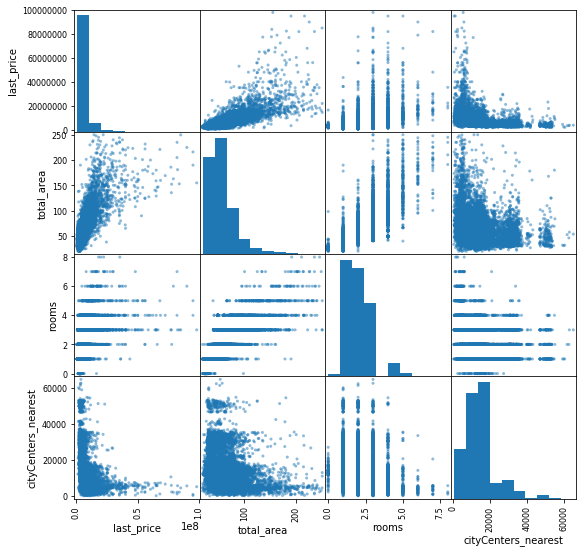

In [19]:
factors_price = good_data.loc[:, ['last_price','total_area', 'rooms','cityCenters_nearest']]
pd.plotting.scatter_matrix(factors_price, figsize=(9, 9))
display(factors_price.corr()) 

Больше всего на цену влияет общая площадь, число комнат также оказывает достаточно сильное влияние. Обратная корреляция цены и удаленности от центра недостоточно сильно выражена.
Также увидели, что число комнаат и общая площадь тесно связаны (что логично). Попробуем по аналогии проанализировать влияние факторов на цену за квадратный метр.

,price_per_meter,total_area,rooms,cityCenters_nearest
price_per_meter,1.000000,0.235744,-0.009880,-0.368166
total_area,0.235744,1.000000,0.788655,-0.236325
rooms,-0.009880,0.788655,1.000000,-0.172990
cityCenters_nearest,-0.368166,-0.236325,-0.172990,1.000000


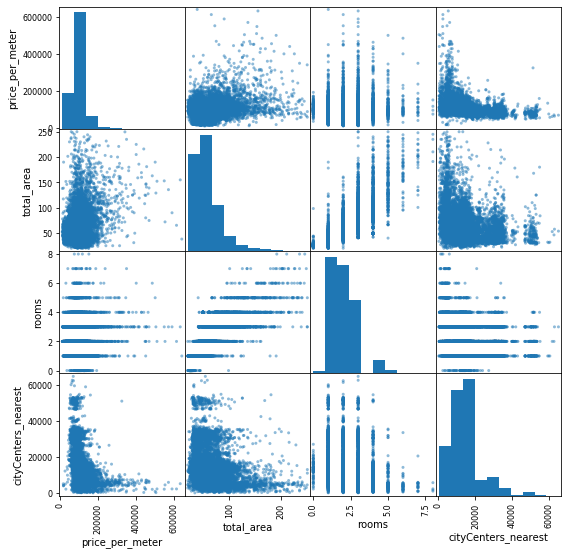

In [20]:
factors_meter_price = good_data.loc[:, ['price_per_meter','total_area', 'rooms','cityCenters_nearest']]
pd.plotting.scatter_matrix(factors_meter_price, figsize=(9, 9))
display(factors_meter_price.corr())

Удаленность от центра сильнее влияет на цену за квадратный метр, чем на общую стоимость (обратная корреляция с параметром удаленности от цента оказалась выше).

**Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.**

,mean,count,median
floor_group,,,
другой,100578.680566,13848,96764.229964
первый,79951.330787,2234,80000.000000
последний,88979.216537,2530,87238.618905


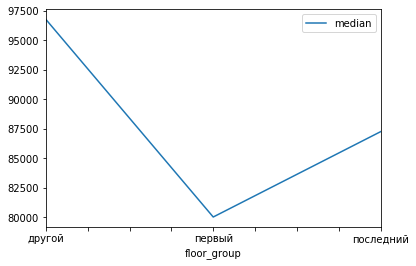

In [21]:
# по категориальным переменным
pivot_table_floor_category = good_data.pivot_table(index = 'floor_group', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y = 'median')
pivot_table_floor_category

В среднем квартиры на первых и последних этажах дешевле, чем другие квартиры. При этом квартиры на первых этажах самые дешевые.

**Также изучим зависимость цены от даты размещения: дня недели, месяца и года.**

,mean,count,median
weekday,,,
0,96362.349255,2761,93750.000000
1,96719.477105,3291,94029.850746
2,96458.522128,3076,94326.623410
3,96970.885812,3412,93884.476868
4,96456.498681,3246,93145.390936
5,96994.947717,1507,92857.142857
6,95027.866917,1319,92639.593909


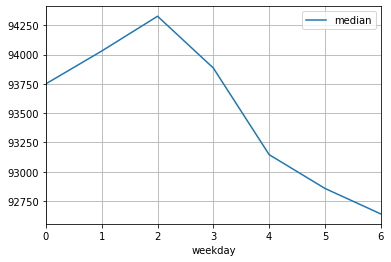

In [22]:
#weekday
pivot_table_weekday = good_data.pivot_table(index = 'weekday', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday.columns = ['mean', 'count', 'median']
pivot_table_weekday.plot(y = 'median', grid=True)
pivot_table_weekday

Стоимость квртир, как и число объявлений, незначительно нарастает к середине рабочей недели и спадает к выходным.

,mean,count,median
month,,,
1,96433.801199,1144,94062.154797
2,96011.153005,2082,93405.797101
3,96132.434308,1742,94287.215611
4,95594.936307,1384,92700.892324
5,96606.714742,1039,92222.222222
6,96147.555490,1526,91763.362266
7,96762.962004,1418,93662.133471
8,97618.635289,1495,95238.095238
9,98854.748465,1711,95041.322314


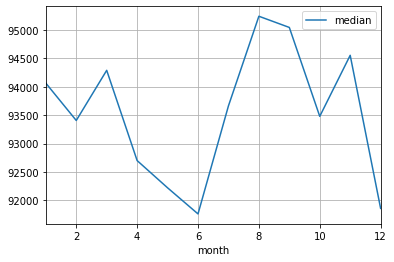

In [23]:
#month
pivot_table_month = good_data.pivot_table(index = 'month', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_month.columns = ['mean', 'count', 'median']
pivot_table_month.plot(y = 'median', grid=True)
pivot_table_month

В ценах квартир наблюдается незначительная сезонность: с начала года и до июня цена снижается, растет в летние месяцы (июль-август) и снижается к концу года. В туристический сезон многие собственники недвижимости могут получать доход с аренды, тем самым сокращая предложение на рынке купли-продажи, что ситмулирует рост цен.

,mean,count,median
year,,,
2014,105071.012421,28,103633.692086
2015,97672.007798,585,90777.777778
2016,95896.588714,2216,91156.155478
2017,95772.606973,7519,92017.738359
2018,96020.294948,7222,95000.000000
2019,105933.305038,1042,103359.915477


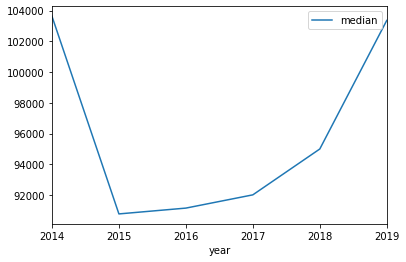

In [24]:
#year
pivot_table_year = good_data.pivot_table(index = 'year', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_year.columns = ['mean', 'count', 'median']
pivot_table_year.plot(y = 'median')
pivot_table_year

В 2015 году произошло снижение цены, что закономерно на фоне общего экономического кризиса, после чего ежегодно средняя цена за квадратный метр росла и к 2019 году вернулась к значениям 2014 года.

**Населённые пункты с самой высокой и низкой стоимостью жилья**

Выберем 10 населённых пунктов с наибольшим числом объявлений и посчитаем среднюю цену квадратного метра в этих населённых пунктах.

In [25]:
locality_table = good_data.pivot_table(index = 'locality_name', values = 'price_per_meter', aggfunc=['count', 'mean', 'median'])
locality_table.columns = ['count', 'mean','median']
locality_table = locality_table.sort_values('count', ascending = False).head(10)
display(locality_table)
#самая высокая стоимость
print(locality_table[locality_table['mean']==locality_table['mean'].max()])
#самая низкая стоимость
print(locality_table[locality_table['mean']==locality_table['mean'].min()])

,count,mean,median
locality_name,,,
Санкт-Петербург,12264,110550.784486,102803.738318
посёлок Мурино,487,85860.406281,86231.884058
посёлок Шушары,383,77968.443530,75949.367089
Всеволожск,311,68383.918894,65511.111111
Колпино,291,74655.609078,73529.411765
посёлок Парголово,281,89239.345609,91250.000000
Пушкин,275,101976.222199,97625.329815
деревня Кудрово,266,92663.273158,92044.864227
Гатчина,242,68002.897954,67123.541888


                 count           mean         median
locality_name                                       
Санкт-Петербург  12264  110550.784486  102803.738318
               count          mean        median
locality_name                                   
Выборг           191  56885.045748  56756.756757


Санкт-Петербург является населённым пунктом с самой высокой стоимостью жилья, Выборг - с самой низкой.

### Анализ квартир в центре Санкт-Петербурга ###

Создадим подвыборку квартир в Санкт-Петербурге и выясним, какая область входит в центр.

20


,mean,median,count
,price_per_meter,price_per_meter,price_per_meter
cityCenters_km,,,
0,148594.126560,126974.556489,58
1,139474.709874,122448.979592,148
2,136294.655763,112307.692308,215
3,117813.465801,106966.882447,352
4,135841.706527,125374.416026,638
5,141518.836859,124884.473198,522
6,140232.468026,124390.243902,333
7,137564.703393,124541.734861,312


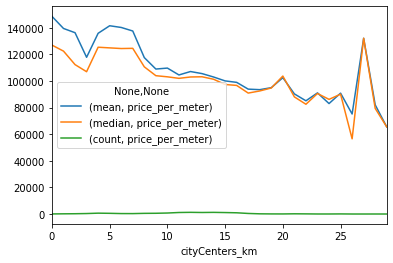

In [26]:
# создадим подвыборку квартир в Спб
data_spb = good_data.query('locality_name == "Санкт-Петербург"')
# посчитаем и уберем записи без расстояния до центра
print(data_spb['cityCenters_nearest'].isnull().sum())
data_spb = data_spb.dropna(subset=['cityCenters_nearest'])
# вычислим расстояние до центра в километрах и округлим до целых значений
data_spb['cityCenters_km'] = (data_spb['cityCenters_nearest']/1000).astype('int').round(0)
# посчитаем среднюю цену для каждого километра и выведем график
spb_table = data_spb.pivot_table(index = 'cityCenters_km', values = 'price_per_meter', aggfunc = ['mean', 'median','count'])
display(spb_table)
spb_table.plot()

На графике видно, что цена за квадратный метр снижается с первого же километра, однако после 3 км происходит скачок цены вверх. После отметки 6 км характер графика меняется и цена посотояяно снижается. После 25 км происходит еще один скачок, но значения посчитаны всего по 2 наблюдениям и им нельзя доверять. Поэтому определим границу центральной зоны как 6 км от центра.

**Проанализируем квартиры в центре**

Выделим сегмент квартир в центре и изучим площадь, цену, число комнат и высоту потолков. 

Квартир в центре: 2266
total_area


count    2266.000000
mean       84.158451
std        40.851895
min        20.000000
25%        54.325000
50%        75.200000
75%       102.232500
max       249.700000
Name: total_area, dtype: float64

last_price


count    2.266000e+03
mean     1.177071e+07
std      1.033494e+07
min      1.600000e+06
25%      6.400000e+06
50%      8.600000e+06
75%      1.290000e+07
max      9.800000e+07
Name: last_price, dtype: float64

rooms


count    2266.000000
mean        2.693733
std         1.260269
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: rooms, dtype: float64

ceiling_height


count    2266.000000
mean        2.915719
std         0.338365
min         2.500000
25%         2.650000
50%         2.800000
75%         3.100000
max         4.500000
Name: ceiling_height, dtype: float64

days_exposition


count    2266.000000
mean      171.602824
std       150.876917
min         3.000000
25%        52.000000
50%       119.000000
75%       260.000000
max       600.000000
Name: days_exposition, dtype: float64

count    18612.000000
mean       141.120997
std        138.105089
min          1.000000
25%         41.000000
50%         90.000000
75%        199.000000
max        600.000000
Name: days_exposition, dtype: float64

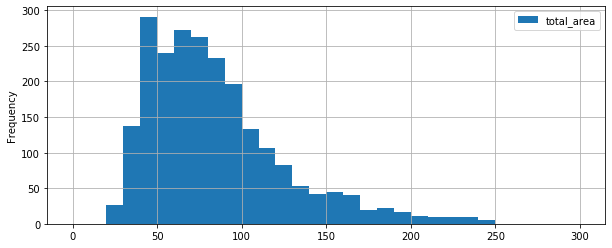

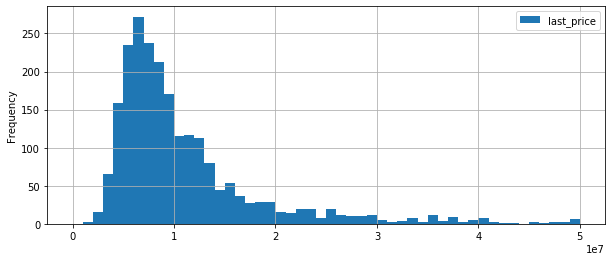

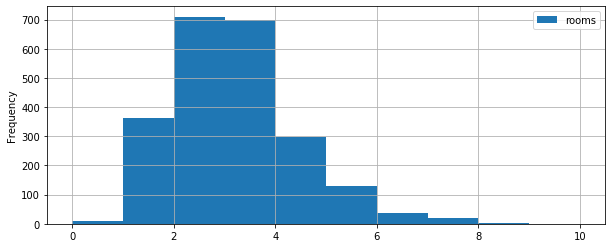

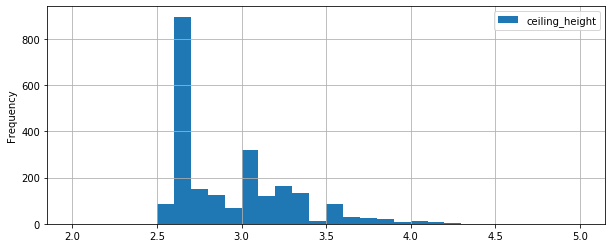

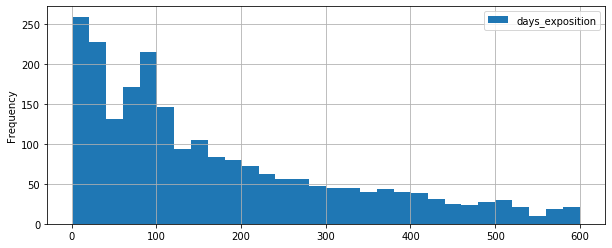

In [27]:
data_spb_center = data_spb.query('cityCenters_km <= 6')
print('Квартир в центре:', len(data_spb_center))

for var in var_list:
    print (var)
    display(data_spb_center.loc[:,var].describe())

data_spb_center.plot(y = 'total_area', kind = 'hist', bins = 30, grid=True, figsize = (10,4), range = (0,300))
data_spb_center.plot(y = 'last_price', kind = 'hist', bins = 50, grid=True, figsize = (10,4), range = (0 , 50000000))
data_spb_center.plot(y = 'rooms', kind = 'hist', bins = 10, grid=True, figsize = (10,4), range = (0,10))
data_spb_center.plot(y = 'ceiling_height', kind = 'hist', bins = 30, grid=True, figsize = (10,4), range = (2,5))
data_spb_center.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid=True, figsize = (10,4), range = (1,600))
# справочно
display(good_data.loc[:,'days_exposition'].describe())

В анализе участвует 2266 объявлений о продаже квартир в центре Санкт-Петербурга.

**Площадь.**
Площадь в среднем на 24 квадратных метра больше, чем по общей выборке. При этом 50% значений находятся в диапазоне от 54 до 100 квадратных метров.

**Цена.**
Медианная цена составляет 8.6 млн, что существенно выше значения по всем объявлениям (было 4.65). Половина квартир выставлена по стоимости от 6.4 до 12.9 млн с пиковым знчением 6-7 млн. 

**Число комнат.**
В отличие от всей выборки, в центре чаще всего выставляются квартиры с 2-4 комнатами (а не 1-3)

**Высота потолков.**
Как и в целом по выборке, в центре преобладают квартиры с потолками от 2.6 до 2.7 метров (пиковое значение), но также на гистограмме видно существенную долю потолков от 3 метров - это исторический жилой фонд или новые дома комфорт-класса.

**Время продажи квартиры.**
В среднем продажа квартиры в центре занимает больше времени. Об этом свидетельствует и медиана 119 (а была 90 дней), межквартильный размах в (центре 52-260, тогда как в целом 41-199). Это может быть связано с тем, что банки хуже дают ипотеку в старом фонде (сложнее найти покупателя) и требуется больше времени на оформление согласования перепланировки в исторической части города.

### Факторы, влияющие на стоимость квартиры в центре ###

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.673402,0.380174,-0.039426
total_area,0.673402,1.000000,0.788454,-0.129085
rooms,0.380174,0.788454,1.000000,-0.183444
cityCenters_nearest,-0.039426,-0.129085,-0.183444,1.000000


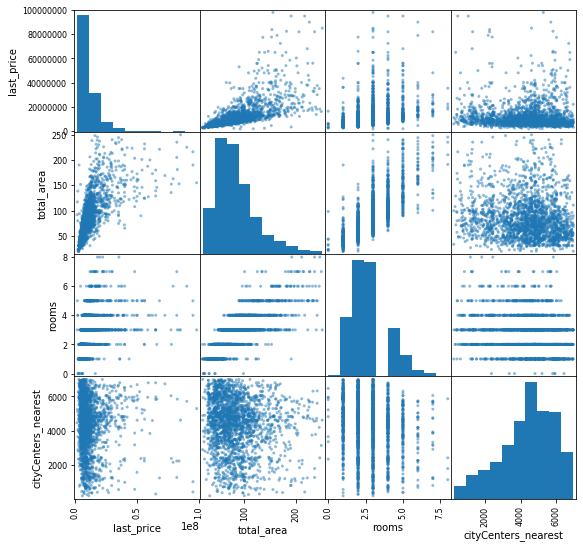

In [28]:
factors_center = data_spb_center.loc[:, ['last_price','total_area', 'rooms','cityCenters_nearest']]
pd.plotting.scatter_matrix(factors_center, figsize=(9, 9))
display(factors_center.corr())

Связь цены с общей площадью и числом комнат ниже, чем по всей выборке, а связи с удаленностью практически нет, что логично, поскольку квартриры и так находятся в центре.

,mean,count,median
floor_group,,,
другой,140967.037163,1603,125234.576471
первый,116968.734436,268,107603.603604
последний,126465.517491,395,113253.012048


,mean,count,median
weekday,,,
0,134482.447966,347,122086.570477
1,132950.112285,389,115000.000000
2,135649.227770,378,123200.757576
3,132799.471232,472,116384.943182
4,137492.240399,378,123556.840714
5,145328.929372,178,128567.538126
6,137832.926365,124,120189.753321


,mean,count,median
month,,,
1,141207.457609,111,125000.000000
2,138204.355578,246,119514.052673
3,137754.279140,209,126927.639383
4,129258.719757,169,116119.402985
5,129161.263884,138,114875.000000
6,130699.552956,202,114817.361513
7,134334.398719,191,115000.000000
8,136987.464977,179,124390.243902
9,139871.653215,221,123529.411765


,mean,count,median
year,,,
2014,146629.583011,5,105157.894737
2015,140772.141452,104,112830.371383
2016,127137.722457,320,112206.425398
2017,136364.338591,989,119664.268585
2018,135007.387969,744,122637.829912
2019,152926.071941,104,136142.983230


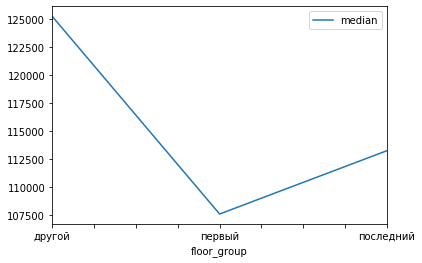

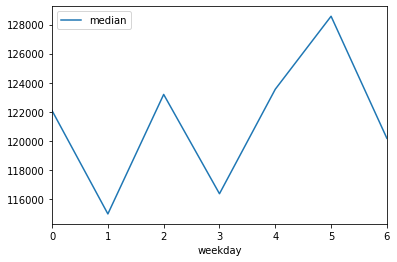

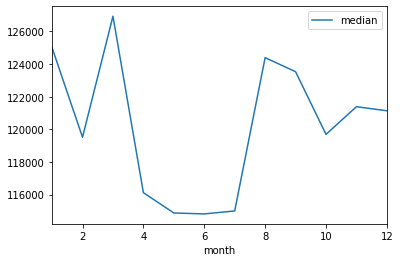

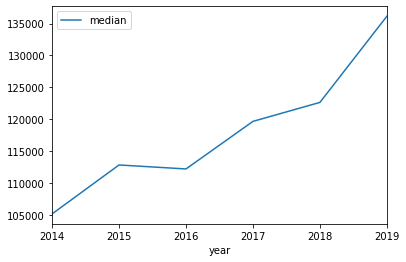

In [29]:
#floor_group
spb_floor_category = data_spb_center.pivot_table(index = 'floor_group', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
spb_floor_category.columns = ['mean', 'count', 'median']
spb_floor_category.plot(y = 'median')
display(spb_floor_category)
#weekday
spb_weekday = data_spb_center.pivot_table(index = 'weekday', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
spb_weekday.columns = ['mean', 'count', 'median']
spb_weekday.plot(y = 'median')
display(spb_weekday)

#month
spb_month = data_spb_center.pivot_table(index = 'month', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
spb_month.columns = ['mean', 'count', 'median']
spb_month.plot(y = 'median')
display(spb_month)

#year
spb_year = data_spb_center.pivot_table(index = 'year', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
spb_year.columns = ['mean', 'count', 'median']
spb_year.plot(y = 'median')
display(spb_year)

В центре, так же как и в целом по выборке, квартиры на первых и последних этажах дешевле, чем другие квартиры. При этом квартиры на первых этажах самые дешевые.
Ценовые максимумы приходятся на среду и субботу, минимумы - на вторник и четверг, в отличие от всего датасета, где цена равномерно росла к середине рабочей недели.
Созонность цен на квартиры в центре более выражена, ценовые максимумы также приходятся на март и август, однако минимальные значения наблюдаются с апреля по июль (а не только в июне).
Цены на квартиры в центре непрерывно растут с 2014 года, в отличие от всей выборки.

## Общий вывод

На этапе предобработки в данных были обнаружены и исправлены пропуски. С целью сохранения данных большинство пропусков были заменены характерными значениями или 0. Там, где это необходимо, тип данных изменен. Также для удобства анализа созданы новые переменные доли кухни и жилых помещений в общей площади, цены квадратного метра. Для корректности дальнейших расчетов и наглядности графиков аномальные и выбивающиеся значения были удалены.

Интересно, что при исследовательском анализе данных удалось обнаружить пиковые значения сроков размещения объявлений и интерпретировать их с помощью правил сервиса Яндекс.Недвижимость, установив, что в ряде случаев эта переменная отражает не время продажи, а время до автоматического удаления объявления сервисом. Благодаря этому удалость убрать из данных записи объявлений не проданных, а просто снятых с продажи квартир. После удаления выбросов было установлено, что типичное время продажи квартиры составляет 119 дней.

Согласно полученным результатам анализа, на рынке Санкт-Петербурга преобладают 1- и 2-комнатные квартиры, площадью 40-50 квадратных метров за 4-5 млн, с высотой потолков 2.6 метров. Следует оговориться, что в центре Санкт-Петербурга эти параметры отличаются: цена, метраж, высота потолков, время продажи и число комнат принимают существенно большие значения.

Также было выявлено, что на стоимость квартир больше всего влияет общая площадь, в меньшей степени - количество комнат и еще меньше - расположение. Тем не менее, анализ средних цен в зависимости от уделенности от центра позволил установить границы центральной зоны - 6 км от центра, где рынок жилья имеет ряд отличительных особенностей. Одна из которых - непрерывный рост цен на протяжении всего периода, тогда как в целом по выборке в 2015 году было заметное снижение.

Чтобы установить дополнительные параметры, влияющие на рыночную стоимость объектов недвижимости, можно расширить перечень переменных, участвующих в анализе, включая близость аэропорта, парков, водоемов, площади кухни и жилых помещений. А также использовать дополнительные переменные, которых не было в датасете: класс жилья, год постройки, близость к метро, параметры квартир и отделки и так далее.